## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]


reduce_lr_factor = [0.99, 0.5, 0.1]
redice_lr_patient = [3, 5, 10]

In [8]:
import itertools
from keras.callbacks import ReduceLROnPlateau
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
        print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)


        reduce_lr = ReduceLROnPlateau(factor=reduce_factor, min_lr=1e-12, monitor='val_loss', patient=reduce_patient, verbose=1)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[reduce_lr]
                 )

        # Collect results
        exp_name_tag = ("exp-%s" % (i))
        results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                                 'valid-loss': model.history.history["val_loss"],
                                 'train-acc': model.history.history["accuracy"],
                                 'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.99, reduce_patient: 3
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
b

Epoch 11/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3146 - accuracy: 0.5398 - val_loss: 1.4873 - val_accuracy: 0.4779
Epoch 12/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2912 - accuracy: 0.5497 - val_loss: 1.4800 - val_accuracy: 0.4752
Epoch 13/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2704 - accuracy: 0.5566 - val_loss: 1.4714 - val_accuracy: 0.4820
Epoch 14/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2476 - accuracy: 0.5654 - val_loss: 1.4808 - val_accuracy: 0.4835
Epoch 15/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2277 - accuracy: 0.5735 - val_loss: 1.4629 - val_accuracy: 0.4815
Epoch 16/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2097 - accuracy: 0.5780 - val_loss: 1.4574 - val_accuracy: 0.4853
Epoch 17/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.1909 - accuracy: 0.5864 - val_

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 50us/step - loss: 2.2479 - accuracy: 0.2613 - val_loss: 2.1313 - val_accuracy: 0.1855
Epoch 2/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.7691 - accuracy: 0.3838 - val_loss: 1.9984 - val_accuracy: 0.2822
Epoch 3/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.6424 - accuracy: 0.4244 - val_loss: 1.8437 - val_accuracy: 0.3561
Epoch 4/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.5700 - accuracy: 0.4509 - val_loss: 1.7249 - val_accuracy: 0.3976
Epoch 5/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.5153 - accuracy: 0.4691 - val_loss: 1.6414 - val_accuracy: 0.4264
Epoch 6/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.4726 - accuracy: 0.4869 - val_loss: 1.5851 - val_accuracy: 0.4408
Epoch 7/25
50000/50000 [==============================] - 2s 39us/st

Epoch 21/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.1087 - accuracy: 0.6199 - val_loss: 1.4474 - val_accuracy: 0.4895
Epoch 22/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.0920 - accuracy: 0.6252 - val_loss: 1.4588 - val_accuracy: 0.4902
Epoch 23/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.0753 - accuracy: 0.6315 - val_loss: 1.4523 - val_accuracy: 0.4947
Epoch 24/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.0577 - accuracy: 0.6395 - val_loss: 1.4359 - val_accuracy: 0.4954
Epoch 25/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.0422 - accuracy: 0.6440 - val_loss: 1.4418 - val_accuracy: 0.5008
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 10
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)           

Epoch 6/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4671 - accuracy: 0.4872 - val_loss: 1.5874 - val_accuracy: 0.4488
Epoch 7/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4312 - accuracy: 0.5012 - val_loss: 1.5441 - val_accuracy: 0.4575
Epoch 8/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3971 - accuracy: 0.5117 - val_loss: 1.5188 - val_accuracy: 0.4655
Epoch 9/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3682 - accuracy: 0.5226 - val_loss: 1.5080 - val_accuracy: 0.4679
Epoch 10/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3404 - accuracy: 0.5334 - val_loss: 1.5001 - val_accuracy: 0.4718
Epoch 11/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3173 - accuracy: 0.5423 - val_loss: 1.4856 - val_accuracy: 0.4788
Epoch 12/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2919 - accuracy: 0.5521 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 50us/step - loss: 2.2283 - accuracy: 0.2603 - val_loss: 2.1571 - val_accuracy: 0.1761
Epoch 2/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.7762 - accuracy: 0.3770 - val_loss: 1.9928 - val_accuracy: 0.2841
Epoch 3/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.6449 - accuracy: 0.4230 - val_loss: 1.8400 - val_accuracy: 0.3698
Epoch 4/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.5683 - accuracy: 0.4479 - val_loss: 1.7239 - val_accuracy: 0.4087
Epoch 5/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.5110 - accuracy: 0.4677 - val_loss: 1.6345 - val_accuracy: 0.4308
Epoch 6/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.4667 - accuracy: 0.4860 - val_loss: 1.5918 - val_accuracy: 0.4383
Epoch 7/25
50000/50000 [==============================] - 2s 40us/st

50000/50000 [==============================] - 2s 41us/step - loss: 0.5721 - accuracy: 0.8063 - val_loss: 2.1054 - val_accuracy: 0.4244
Epoch 21/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.5408 - accuracy: 0.8160 - val_loss: 2.0076 - val_accuracy: 0.4324
Epoch 22/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.5074 - accuracy: 0.8286 - val_loss: 2.0362 - val_accuracy: 0.4334
Epoch 23/25
50000/50000 [==============================] - 2s 40us/step - loss: 0.4666 - accuracy: 0.8424 - val_loss: 1.8374 - val_accuracy: 0.4652
Epoch 24/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.4294 - accuracy: 0.8572 - val_loss: 2.0264 - val_accuracy: 0.4700
Epoch 25/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.4126 - accuracy: 0.8624 - val_loss: 2.2053 - val_accuracy: 0.4426
Numbers of exp: 10, reduce_factor: 0.99, reduce_patient: 5
Model: "model_11"
_______________________________________________

50000/50000 [==============================] - 2s 41us/step - loss: 1.4021 - accuracy: 0.5013 - val_loss: 1.5847 - val_accuracy: 0.4232
Epoch 5/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.3534 - accuracy: 0.5177 - val_loss: 1.7248 - val_accuracy: 0.3934
Epoch 6/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.2975 - accuracy: 0.5391 - val_loss: 1.5690 - val_accuracy: 0.4476
Epoch 7/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.2508 - accuracy: 0.5564 - val_loss: 1.5381 - val_accuracy: 0.4647
Epoch 8/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.2063 - accuracy: 0.5715 - val_loss: 1.4438 - val_accuracy: 0.4858
Epoch 9/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.1640 - accuracy: 0.5865 - val_loss: 1.4821 - val_accuracy: 0.4770
Epoch 10/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.1220 - accuracy: 0.6038 - val_loss: 1.5241 - va

50000/50000 [==============================] - 2s 41us/step - loss: 0.6413 - accuracy: 0.7834 - val_loss: 1.5089 - val_accuracy: 0.5127
Epoch 24/25
50000/50000 [==============================] - 2s 42us/step - loss: 0.6160 - accuracy: 0.7914 - val_loss: 1.5075 - val_accuracy: 0.5226
Epoch 25/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.5941 - accuracy: 0.8004 - val_loss: 1.5078 - val_accuracy: 0.5317
Numbers of exp: 13, reduce_factor: 0.50, reduce_patient: 5
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_40 (Batc (None, 256)               1024      
_____________________________

50000/50000 [==============================] - 2s 41us/step - loss: 1.1374 - accuracy: 0.6027 - val_loss: 1.6096 - val_accuracy: 0.4258
Epoch 8/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.0942 - accuracy: 0.6186 - val_loss: 1.5023 - val_accuracy: 0.4651
Epoch 9/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.0516 - accuracy: 0.6340 - val_loss: 1.4365 - val_accuracy: 0.4921
Epoch 10/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.0134 - accuracy: 0.6475 - val_loss: 1.4907 - val_accuracy: 0.4752
Epoch 11/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.9770 - accuracy: 0.6634 - val_loss: 1.5760 - val_accuracy: 0.4565
Epoch 12/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.9388 - accuracy: 0.6766 - val_loss: 1.4048 - val_accuracy: 0.5054
Epoch 13/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.9076 - accuracy: 0.6875 - val_loss: 1.5836 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.2307 - accuracy: 0.2667 - val_loss: 2.1821 - val_accuracy: 0.1907
Epoch 2/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.8272 - accuracy: 0.3690 - val_loss: 2.0700 - val_accuracy: 0.2527
Epoch 3/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.7255 - accuracy: 0.4025 - val_loss: 1.9410 - val_accuracy: 0.3213
Epoch 4/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.6658 - accuracy: 0.4202 - val_loss: 1.8249 - val_accuracy: 0.3657
Epoch 5/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.6225 - accuracy: 0.4361 - val_loss: 1.7436 - val_accuracy: 0.3945
Epoch 6/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.5879 - accuracy: 0.4481 - val_loss: 1.6922 - val_accuracy: 0.4009
Epoch 7/25
50000/50000 [==============================] - 2s 42us/st

Epoch 21/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.3405 - accuracy: 0.5348 - val_loss: 1.5390 - val_accuracy: 0.4543
Epoch 22/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.3316 - accuracy: 0.5385 - val_loss: 1.5355 - val_accuracy: 0.4594
Epoch 23/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.3230 - accuracy: 0.5420 - val_loss: 1.5303 - val_accuracy: 0.4578
Epoch 24/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.3145 - accuracy: 0.5460 - val_loss: 1.5258 - val_accuracy: 0.4596
Epoch 25/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.3063 - accuracy: 0.5478 - val_loss: 1.5217 - val_accuracy: 0.4640
Numbers of exp: 18, reduce_factor: 0.99, reduce_patient: 3
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 3072)          

50000/50000 [==============================] - 2s 41us/step - loss: 1.2736 - accuracy: 0.5478 - val_loss: 2.0603 - val_accuracy: 0.3140
Epoch 6/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.2213 - accuracy: 0.5687 - val_loss: 1.6909 - val_accuracy: 0.3991
Epoch 7/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.1731 - accuracy: 0.5841 - val_loss: 1.9915 - val_accuracy: 0.3540
Epoch 8/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.1348 - accuracy: 0.5990 - val_loss: 1.5609 - val_accuracy: 0.4476
Epoch 9/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.0903 - accuracy: 0.6149 - val_loss: 1.6155 - val_accuracy: 0.4474
Epoch 10/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.0414 - accuracy: 0.6330 - val_loss: 1.5218 - val_accuracy: 0.4690
Epoch 11/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.0072 - accuracy: 0.6466 - val_loss: 1.7287 - v

50000/50000 [==============================] - 2s 41us/step - loss: 0.5946 - accuracy: 0.7953 - val_loss: 2.1782 - val_accuracy: 0.4331
Epoch 25/25
50000/50000 [==============================] - 2s 40us/step - loss: 0.5683 - accuracy: 0.8058 - val_loss: 1.9622 - val_accuracy: 0.4376
Numbers of exp: 21, reduce_factor: 0.50, reduce_patient: 3
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_64 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               65792     
_____________________________________________

50000/50000 [==============================] - 2s 40us/step - loss: 1.1098 - accuracy: 0.6127 - val_loss: 1.6597 - val_accuracy: 0.4250
Epoch 9/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.0683 - accuracy: 0.6297 - val_loss: 1.8278 - val_accuracy: 0.4115
Epoch 10/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.0295 - accuracy: 0.6427 - val_loss: 1.6596 - val_accuracy: 0.4260
Epoch 11/25
50000/50000 [==============================] - 2s 39us/step - loss: 0.9910 - accuracy: 0.6562 - val_loss: 1.6402 - val_accuracy: 0.4367
Epoch 12/25
50000/50000 [==============================] - 2s 39us/step - loss: 0.9563 - accuracy: 0.6698 - val_loss: 1.7965 - val_accuracy: 0.4119
Epoch 13/25
50000/50000 [==============================] - 2s 40us/step - loss: 0.9251 - accuracy: 0.6780 - val_loss: 1.7802 - val_accuracy: 0.3952
Epoch 14/25
50000/50000 [==============================] - 2s 39us/step - loss: 0.8857 - accuracy: 0.6943 - val_loss: 1.7298 

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.9605 - accuracy: 0.3280 - val_loss: 2.1398 - val_accuracy: 0.1960
Epoch 2/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.6489 - accuracy: 0.4219 - val_loss: 1.9211 - val_accuracy: 0.3532
Epoch 3/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.5319 - accuracy: 0.4641 - val_loss: 1.8202 - val_accuracy: 0.3684
Epoch 4/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4525 - accuracy: 0.4926 - val_loss: 1.7078 - val_accuracy: 0.4021
Epoch 5/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3935 - accuracy: 0.5148 - val_loss: 1.6528 - val_accuracy: 0.4051
Epoch 6/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3412 - accuracy: 0.5349 - val_loss: 1.5929 - val_accuracy: 0.4383
Epoch 7/25
50000/50000 [==============================] - 2s 39us/st

50000/50000 [==============================] - 2s 40us/step - loss: 1.4907 - accuracy: 0.4786 - val_loss: 1.6205 - val_accuracy: 0.4322
Epoch 21/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4781 - accuracy: 0.4827 - val_loss: 1.6159 - val_accuracy: 0.4295
Epoch 22/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4663 - accuracy: 0.4870 - val_loss: 1.6097 - val_accuracy: 0.4341
Epoch 23/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4556 - accuracy: 0.4908 - val_loss: 1.5981 - val_accuracy: 0.4387
Epoch 24/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4450 - accuracy: 0.4948 - val_loss: 1.5980 - val_accuracy: 0.4387
Epoch 25/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.4338 - accuracy: 0.5000 - val_loss: 1.5911 - val_accuracy: 0.4399
Numbers of exp: 26, reduce_factor: 0.10, reduce_patient: 10
Model: "model_27"
______________________________________________

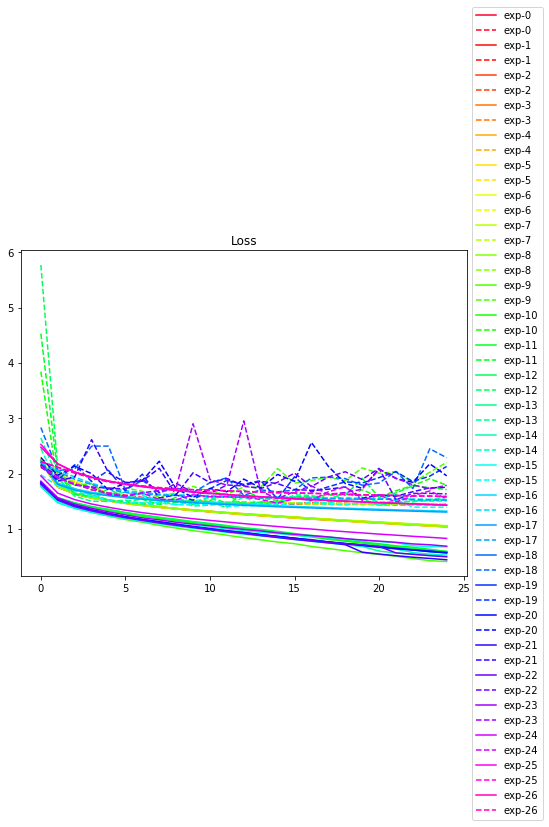

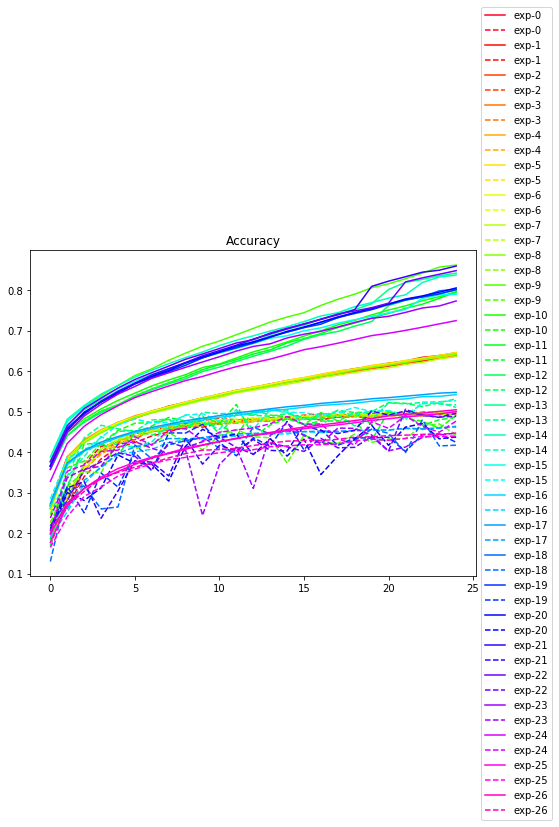

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()